In [78]:
import numpy as np
import pandas as pd
import pylab as py
import lib
import sys


In [71]:
c_m = 299792458.
pi = np.pi
radeg = (180./pi)



In [72]:
def read_txt3f_commma(filename):
    import fileinput
    arr1 = []
    arr2 = []
    arr3 = []
    filelines = fileinput.input(filename)
    i=0
    for line in filelines:
        print( i, line )
        ar = line.split(",")
        arr1.append(float(ar[0]))
        arr2.append(float(ar[1]))
        arr3.append(float(ar[2]))
        i+=1

    print( 'read from ' )
    print( '   ', filename )
    print( '    num= ', len(arr1) )
    return np.array(arr1), np.array(arr2), np.array(arr3)


In [73]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

dir_par = '/home/julientang2001/Stage3A/'
dir_data =  dir_par+'/Shaul202211_3dpripowderflatalumina/'

print(dir_data+'/WR22_SiPatterned0RA.csv')


data_WR22_TA_arr = read_txt3f_commma(dir_data+'/WR22_SapphireTA.txt')
data_WR34_TA_arr = read_txt3f_commma(dir_data+'/WR34_SapphireTA.txt')

data_WR22_TB_arr = read_txt3f_commma(dir_data+'/WR22_SapphireTB.txt')
data_WR34_TB_arr = read_txt3f_commma(dir_data+'/WR34_SapphireTB.txt')
data_WR51_TB_arr = read_txt3f_commma(dir_data+'/WR51_SapphireTB.txt')

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



/home/julientang2001/Stage3A//Shaul202211_3dpripowderflatalumina//WR22_SiPatterned0RA.csv
0 310000000000,0.57785571,90.235855

1 310250000000,0.97946894,83.557648

2 310500000000,0.17124602,97.21209

3 310750000000,2.7134428,106.81887

4 311000000000,0.83149338,97.533127

5 311250000000,0.92350525,92.777039

6 311500000000,0.67670524,95.365776

7 311750000000,0.74975252,98.051414

8 312000000000,0.80072588,95.061005

9 312250000000,0.76551962,100.88983

10 312500000000,0.88394541,90.49794

11 312750000000,0.96922678,80.507736

12 313000000000,1.057693,74.946823

13 313250000000,0.73431796,67.877594

14 313500000000,1.0765792,69.571281

15 313750000000,0.74186784,72.294342

16 314000000000,1.0253371,69.441483

17 314250000000,0.91403413,64.099289

18 314500000000,0.96003127,58.378597

19 314750000000,0.99065477,52.592636

20 315000000000,0.86579198,47.600327

21 315250000000,0.94853258,50.268433

22 315500000000,0.97621179,42.226177

23 315750000000,0.97087836,36.788502

24 316000000000

In [74]:
fname = '/home/julientang2001/Stage3A/Shaul202211_3dpripowderflatalumina/WR51_SapphireTA.csv'
arr = pd.read_csv(fname,encoding="cp932",skipfooter=2,header = 6)
freq51 = arr['Freq(Hz)']
trans51 = arr['S11 Lin Mag(U)']
phase51 = arr['S11 Phase(ｰ)']
data_WR51_TA_arr = np.zeros((3,np.size(freq51)))
data_WR51_TA_arr[0]=freq51
data_WR51_TA_arr[1]=trans51
data_WR51_TA_arr[2]=phase51

/tmp/ipykernel_284/300609044.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  arr = pd.read_csv(fname,encoding="cp932",skipfooter=2,header = 6)


In [75]:
delta_freqGHz = 10. # GHz

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [76]:
freq22 = data_WR22_TA_arr[0]
transAB22 = np.subtract(data_WR22_TA_arr[1]**2,data_WR22_TB_arr[1]**2)
freq34 = data_WR34_TA_arr[0]
transAB34 = np.subtract(data_WR34_TA_arr[1]**2,data_WR34_TB_arr[1]**2)
transAB51 = np.subtract(data_WR51_TA_arr[1]**2,data_WR51_TB_arr[1]**2)



Text(0, 0.5, 'Transmittance')

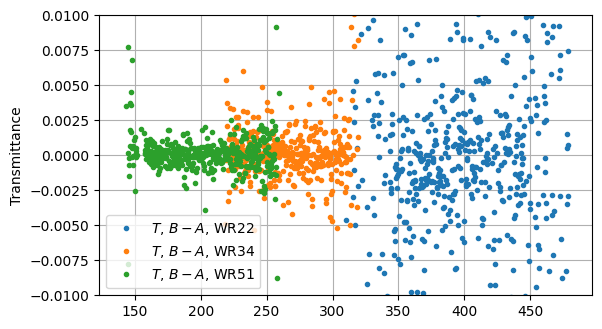

In [77]:

figsize = (14,8)
py.figure( figsize=figsize)
py.subplot(221); 
py.plot(freq22*1e-9,transAB22,'.',label='$T$, $B-A$, WR22')
py.plot(freq34*1e-9,transAB34,'.',label='$T$, $B-A$, WR34')
py.plot(freq51*1e-9,transAB51,'.',label='$T$, $B-A$, WR51')
#py.plot([220,220],[1e-3,1.1],'--m',linewidth=3)
#py.plot([440,440],[1e-3,1.1],'--m',linewidth=3)
#py.semilogy()
py.grid()
py.ylim([-0.01,0.01])
py.legend(loc='best')
py.ylabel('Transmittance')